In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2024-01-13 13:36:44.386383: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-13 13:36:44.386437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-13 13:36:44.387116: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
X = np.load("X.npy")[0:1000]
y = np.load("y.npy")[0:1000]
print(X.shape)
print(y.shape)

(1000, 400)
(1000, 1)


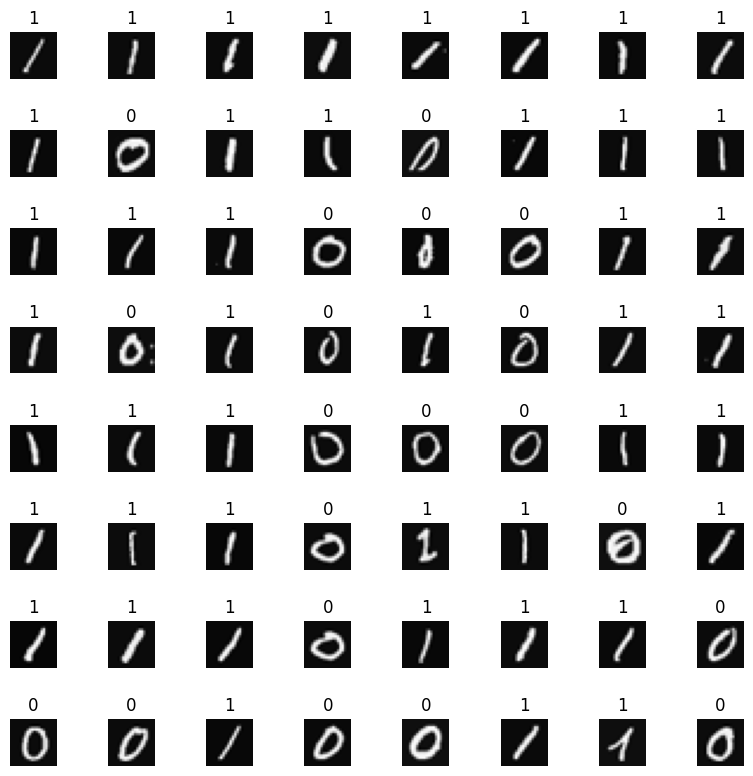

In [5]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap="gray")
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

In [6]:
model = keras.models.Sequential(
    [
        keras.Input(shape=(400,)),
        keras.layers.Dense(25, activation="sigmoid"),
        keras.layers.Dense(15, activation="sigmoid"),
        keras.layers.Dense(1, activation="linear"),
    ],
    name="my_model"
)
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)                │     10,025 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 15)                │        390 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │         16 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy(from_logits=True)
)

In [8]:
model.fit(X, y, epochs=20)

Epoch 1/20
 1/32 ━━━━━━━━━━━━━━━━━━━━ 23s 749ms/step - loss: 0.6930

I0000 00:00:1705174608.662353    2487 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6790
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5104 
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3742 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2669 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1955 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1497 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1138 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0913 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0792 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0657 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0563 
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0482 
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0462 
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0394 
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0439 
Epoch 16/20
32/

In [9]:
y_predicted = np.where(model.predict(X) > 0.5, 1.0, 0.0)
print(f"Accuracy = {np.mean(y_predicted == y)}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy = 0.999


In [10]:
layer1, layer2, layer3 = model.layers
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(W3.shape, b3.shape)

(400, 25) (25,)
(25, 15) (15,)
(15, 1) (1,)


In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def np_dense(a, W, b):
    return sigmoid(np.matmul(a, W) + b)


def np_model(X, W1, b1, W2, b2, W3, b3):
    a1 = np_dense(X, W1, b1)
    a2 = np_dense(a1, W2, b2)
    a3 = np_dense(a2, W3, b3)
    return a3

In [12]:
y_predicted_np = np.where(np_model(X, W1, b1, W2, b2, W3, b3) > 0.5, 1.0, 0.0)
print(f"Numpy model accuracy = {np.mean(y_predicted_np == y)}")

Numpy model accuracy = 0.999
